# Exercises

In [1]:
#import warnings
#warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import env

In [4]:
from importlib import reload

In [244]:
sql = '''
SELECT l.date, l.time, l.user_id, c.name, c.program_id, \
    c.start_date, c.created_at, c.end_date, l.ip, l.path
FROM logs l
JOIN cohorts c ON (c.id = l.cohort_id)
'''
url = env.get_db_url('curriculum_logs')

In [205]:
sql_1 = '''
SELECT l.date, l.time, l.user_id, c.id, c.name, c.program_id, \
    c.start_date, c.created_at, c.end_date, l.ip, l.path
FROM logs l
LEFT JOIN cohorts c ON (c.id = l.cohort_id)
'''

In [206]:
df1 = pd.read_sql(sql_1, url)

In [11]:
df1.to_csv('data/logs1.csv', index=False)

In [209]:
df1.rename({'path':'endpoint', 'user_id':'user', 'id':'cohort_id', 'name':'cohort'}, axis=1, inplace=True)

In [245]:
df1.head(1)

,date,time,user,cohort_id,cohort,program_id,start_date,created_at,end_date,ip,endpoint
0,2018-01-26,09:55:03,1,8.0,Hampton,1.0,2015-09-22,2016-06-14 19:52:26,2016-02-06,97.105.19.61,/


In [253]:
df1.cohort.sort_values().unique()

array(['Andromeda', 'Apex', 'Apollo', 'Arches', 'Badlands', 'Bash',
       'Bayes', 'Betelgeuse', 'Ceres', 'Curie', 'Darden', 'Deimos',
       'Denali', 'Easley', 'Europa', 'Everglades', 'Florence', 'Fortuna',
       'Franklin', 'Ganymede', 'Glacier', 'Hampton', 'Hyperion', 'Ike',
       'Joshua', 'Jupiter', 'Kalypso', 'Kings', 'Lassen', 'Luna',
       'Mammoth', 'Marco', 'Neptune', 'Niagara', 'Oberon', 'Olympic',
       'Pinnacles', 'Quincy', 'Sequoia', 'Staff', 'Teddy', 'Ulysses',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Yosemite', 'Zion', None],
      dtype=object)

In [265]:
end_dates

{'Hampton': '2016-02-06',
 'Teddy': '2018-05-17',
 'Sequoia': '2018-02-15',
 'Arches': '2014-04-22',
 'Niagara': '2017-03-09',
 'Pinnacles': '2017-07-20',
 'Quincy': '2017-09-22',
 'Kings': '2016-09-15',
 'Lassen': '2016-11-10',
 'Mammoth': '2017-02-02',
 'Glacier': '2015-10-06',
 'Denali': '2015-01-18',
 'Joshua': '2016-06-30',
 'Olympic': '2017-05-25',
 'Ulysses': '2018-07-19',
 'Badlands': '2014-08-22',
 'Apollo': '2015-07-29',
 'Ike': '2016-05-12',
 'Voyageurs': '2018-10-11',
 'Wrangell': '2018-11-29',
 'Xanadu': '2019-02-08',
 'Franklin': '2015-05-26',
 'Yosemite': '2019-04-03',
 'Staff': '2014-02-04',
 'Zion': '2019-06-04',
 'Andromeda': '2019-07-30',
 'Betelgeuse': '2019-10-08',
 'Ceres': '2019-12-11',
 'Bayes': '2020-01-30',
 'Deimos': '2020-02-27',
 'Europa': '2020-04-17',
 'Fortuna': '2020-06-23',
 'Curie': '2020-07-07',
 'Apex': '2020-07-29',
 'Ganymede': '2020-08-20',
 'Everglades': '2015-02-24',
 'Hyperion': '2020-11-10',
 'Darden': '2021-01-12',
 'Bash': '2021-01-21',
 'J

In [269]:
with open("end_dates.json", "w") as outfile:
    json.dump(end_dates, outfile)

In [270]:
with open("end_dates.json", "r") as json_file1:
    dates_dict = json.load(json_file1)

In [271]:
dates_dict

{'Hampton': '2016-02-06',
 'Teddy': '2018-05-17',
 'Sequoia': '2018-02-15',
 'Arches': '2014-04-22',
 'Niagara': '2017-03-09',
 'Pinnacles': '2017-07-20',
 'Quincy': '2017-09-22',
 'Kings': '2016-09-15',
 'Lassen': '2016-11-10',
 'Mammoth': '2017-02-02',
 'Glacier': '2015-10-06',
 'Denali': '2015-01-18',
 'Joshua': '2016-06-30',
 'Olympic': '2017-05-25',
 'Ulysses': '2018-07-19',
 'Badlands': '2014-08-22',
 'Apollo': '2015-07-29',
 'Ike': '2016-05-12',
 'Voyageurs': '2018-10-11',
 'Wrangell': '2018-11-29',
 'Xanadu': '2019-02-08',
 'Franklin': '2015-05-26',
 'Yosemite': '2019-04-03',
 'Staff': '2014-02-04',
 'Zion': '2019-06-04',
 'Andromeda': '2019-07-30',
 'Betelgeuse': '2019-10-08',
 'Ceres': '2019-12-11',
 'Bayes': '2020-01-30',
 'Deimos': '2020-02-27',
 'Europa': '2020-04-17',
 'Fortuna': '2020-06-23',
 'Curie': '2020-07-07',
 'Apex': '2020-07-29',
 'Ganymede': '2020-08-20',
 'Everglades': '2015-02-24',
 'Hyperion': '2020-11-10',
 'Darden': '2021-01-12',
 'Bash': '2021-01-21',
 'J

In [264]:
end_dates = {}
for c in df1.cohort.unique():
    print(c)
    unique_dates = df1[df1.cohort == c].end_date.unique()
    if c == None:
        continue
    else:
        d = df1[df1.cohort == c].end_date.unique()[0]
        print(d)
        end_dates[c] = d

Hampton
2016-02-06
Teddy
2018-05-17
Sequoia
2018-02-15
Arches
2014-04-22
Niagara
2017-03-09
Pinnacles
2017-07-20
Quincy
2017-09-22
None
Kings
2016-09-15
Lassen
2016-11-10
Mammoth
2017-02-02
Glacier
2015-10-06
Denali
2015-01-18
Joshua
2016-06-30
Olympic
2017-05-25
Ulysses
2018-07-19
Badlands
2014-08-22
Apollo
2015-07-29
Ike
2016-05-12
Voyageurs
2018-10-11
Wrangell
2018-11-29
Xanadu
2019-02-08
Franklin
2015-05-26
Yosemite
2019-04-03
Staff
2014-02-04
Zion
2019-06-04
Andromeda
2019-07-30
Betelgeuse
2019-10-08
Ceres
2019-12-11
Bayes
2020-01-30
Deimos
2020-02-27
Europa
2020-04-17
Fortuna
2020-06-23
Curie
2020-07-07
Apex
2020-07-29
Ganymede
2020-08-20
Everglades
2015-02-24
Hyperion
2020-11-10
Darden
2021-01-12
Bash
2021-01-21
Jupiter
2021-03-30
Kalypso
2021-05-04
Luna
2021-06-08
Easley
2021-06-08
Marco
2021-07-19
Neptune
2021-09-03
Florence
2021-09-03
Oberon
2021-10-01


In [212]:
# save cohort ids and name into json dictionary for the project
'''
coh_names = df1[['cohort_id', 'cohort']]
ci = coh_names.cohort_id.unique()
cn = coh_names.cohort.unique()
coh_dict = dict(zip(ci, cn))
import json
with open("cohorts.json", "w") as outfile:
    json.dump(coh_dict, outfile)
'''

In [75]:
df1.user_id[df1.user_id == 48].unique()

array([48])

In [79]:
df1[df1.name.isnull()]['user_id'].unique()

array([ 48,  54,  58,  59,  61,  62,  63,  73,  74,  78,  79,  86,  88,
        89, 100, 103, 111, 137, 166, 176, 213, 247, 317, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 372, 375, 403, 406, 429, 544,  64, 713,
       714, 715, 716, 717, 718, 663, 719, 720, 721, 722, 723, 724, 725,
       726, 727, 728, 729, 346, 731, 736, 644, 744, 782, 810, 814, 815])

In [56]:
df = pd.read_csv('logs.csv')

In [20]:
df.head(1)

,date,time,user_id,name,program_id,start_date,created_at,end_date,ip,path
0,2018-01-26,09:55:03,1,Hampton,1,2015-09-22,2016-06-14 19:52:26,2016-02-06,97.105.19.61,/


In [57]:
df.rename({'path':'endpoint', 'user_id':'user', 'name':'cohort'}, axis=1, inplace=True)

In [22]:
df.head(1)

,date,time,user,cohort,program_id,start_date,created_at,end_date,ip,endpoint
0,2018-01-26,09:55:03,1,Hampton,1,2015-09-22,2016-06-14 19:52:26,2016-02-06,97.105.19.61,/


##### 1. Label students by the program they are in.

In [59]:
df.isnull().sum()

date          0
time          0
user          0
cohort        0
program_id    0
start_date    0
created_at    0
end_date      0
ip            0
endpoint      1
dtype: int64

In [16]:
df.program_id.unique()

array([1, 2, 4, 3])

In [18]:
df.dtypes

date          object
time          object
user           int64
cohort        object
program        int64
start_date    object
created_at    object
end_date      object
ip            object
endpoint      object
dtype: object

In [ ]:
# 1 - PHP
# 2 - Java
# 3 - Data Science
# 4 - Front End

In [61]:
df['program'] = df.program_id.map({1:'PHP', 2:'Java', 3:'DS', 4:'Front End'})
df['field'] = np.where(df.program_id == 3, 'DS', 'WebDev')

In [63]:
try:
    del df['program_id']
    del df['time']
except KeyError:
    print('The column doesn\'t exist')

In [62]:
df.head(1)

,date,time,user,cohort,program_id,start_date,created_at,end_date,ip,endpoint,program,field
0,2018-01-26,09:55:03,1,Hampton,1,2015-09-22,2016-06-14 19:52:26,2016-02-06,97.105.19.61,/,PHP,WebDev


In [65]:
dates = ['date', 'start_date', 'created_at', 'end_date']
for col in dates:
    df[col] = pd.to_datetime(df[col])

In [80]:
for col in ['cohort', 'program', 'field']:
    df[col] = pd.Categorical(df[col])

In [89]:
df = df.set_index(df.date)
pages = df['endpoint'].resample('d').count()
pages.head()

date
2018-01-26    533
2018-01-27    230
2018-01-28    168
2018-01-29    783
2018-01-30    614
Freq: D, Name: endpoint, dtype: int64

In [90]:
df.head(1)

,date,user,cohort,start_date,created_at,end_date,ip,endpoint,program,field
date,,,,,,,,,,
2018-01-26,2018-01-26,1,Hampton,2015-09-22,2016-06-14 19:52:26,2016-02-06,97.105.19.61,/,PHP,WebDev


##### 2. Is it possible to identify the `user_id `of a staff member?

In [88]:
df.user[df.cohort == 'Staff'].unique()

array([ 53, 314,  40,  64,  11, 211,   1, 312, 146, 248, 370, 397, 404,
       257, 428, 461,  37, 514, 539, 545, 546, 572, 315,  41, 592, 618,
       620, 521, 652, 502, 653, 480, 738, 742, 745, 813, 430, 816, 581,
       854, 855, 744, 893, 148, 894, 513, 630, 308, 951, 953, 980])

In [87]:
staff_ids = list(df.user[df.cohort == 'Staff'].unique())

##### 3. Identify students who are accessing our curriculum pages beyond the end of their time at Codeup.

In [91]:
df.head()

,date,user,cohort,start_date,created_at,end_date,ip,endpoint,program,field
date,,,,,,,,,,
2018-01-26,2018-01-26,1,Hampton,2015-09-22,2016-06-14 19:52:26,2016-02-06,97.105.19.61,/,PHP,WebDev
2018-01-26,2018-01-26,1,Hampton,2015-09-22,2016-06-14 19:52:26,2016-02-06,97.105.19.61,java-ii,PHP,WebDev
2018-01-26,2018-01-26,1,Hampton,2015-09-22,2016-06-14 19:52:26,2016-02-06,97.105.19.61,java-ii/object-oriented-programming,PHP,WebDev
2018-01-26,2018-01-26,1,Hampton,2015-09-22,2016-06-14 19:52:26,2016-02-06,97.105.19.61,slides/object_oriented_programming,PHP,WebDev
2018-01-26,2018-01-26,2,Teddy,2018-01-08,2018-01-08 13:59:10,2018-05-17,97.105.19.61,javascript-i/conditionals,Java,WebDev


In [203]:
df.cohort.nunique()

47

In [100]:
access_after_enddate = df[df.date > df.end_date].user.unique()

In [97]:
len(df.user.unique())

911

In [95]:
len(access_after_enddate)

592

In [101]:
round(592 / 911 * 100, 1)

65.0

##### 4. Identify students who present anomalous activity using the Bollinger Band method, but reduce K to 2. 

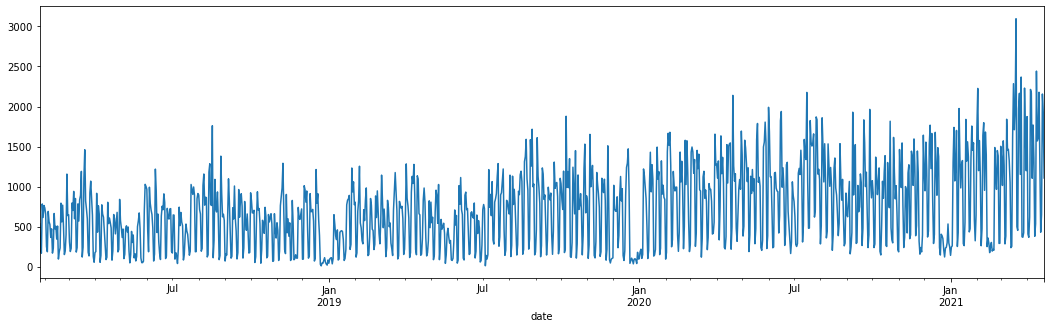

In [102]:
plt.figure(figsize=(18, 5))
pages.plot();

In [105]:
# set the window span
span = 30

# compute midband
midband = pages.ewm(span=span).mean()

# compute exponential stdev
stdev = pages.ewm(span=span).std()

# number of standrad deviations 
k = 2
# compute upper and lower bands
ub = midband + stdev*k
lb = midband - stdev*k
#ub, lb

In [112]:
#bb = pd.DataFrame([pages, midband, stdev, ub, lb], columns=['pages', 'midband', 'stdev', 'ub', 'lb'])
bb = pd.DataFrame({'pages':pages, 'midband':midband, 'stdev':stdev, 'ub':ub, 'lb':lb})

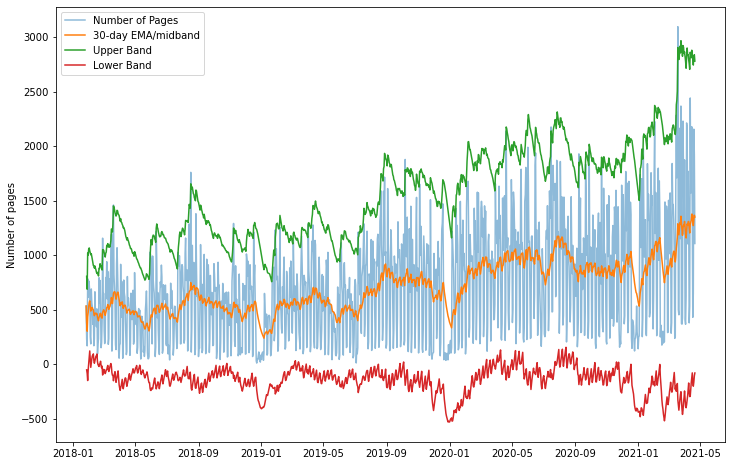

In [125]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(bb.index, bb.pages, label='Number of Pages', alpha=0.5)

ax.plot(bb.index, bb.midband, label = '30-day EMA/midband')
ax.plot(bb.index, bb.ub, label = 'Upper Band')
ax.plot(bb.index, bb.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()

In [126]:
# compute %b
bb['pct_b'] = (bb['pages'] - bb['lb'])/(bb['ub'] - bb['lb'])
bb.head()

,pages,midband,stdev,ub,lb,pct_b
date,,,,,,
2018-01-26,533,533.000000,NaN,NaN,NaN,NaN
2018-01-27,230,376.450000,214.253355,804.956709,-52.056709,0.329116
2018-01-28,168,302.284709,192.738756,687.762221,-83.192803,0.325820
2018-01-29,783,434.739290,292.489456,1019.718202,-150.239623,0.797669
2018-01-30,614,475.525441,262.780177,1001.085795,-50.034912,0.631740


In [130]:
# show anomalies
bb[bb.pct_b>1]

,pages,midband,stdev,ub,lb,pct_b
date,,,,,,
2018-02-27,1156,475.918187,287.695252,1051.308691,-99.472317,1.090974
2018-03-20,1460,649.891473,400.887567,1451.666606,-151.883660,1.005197
2018-05-30,1028,375.089886,298.000143,971.090171,-220.910400,1.047743
2018-07-23,1026,426.685621,285.329352,997.344326,-143.973083,1.025108
2018-08-17,1760,748.528472,453.054285,1654.637043,-157.580099,1.058140
2018-11-08,1291,559.032878,344.747829,1248.528536,-130.462781,1.030799
2019-01-28,1232,446.166837,359.768236,1165.703309,-273.369635,1.046069
2019-07-08,1212,451.405230,355.965562,1163.336355,-260.525895,1.034177
2019-10-07,1878,795.149179,494.505932,1784.161043,-193.862685,1.047441


In [136]:
def one_user_df_prep(df: pd.DataFrame, user: int) -> pd.Series:
    '''
    This function returns a Series consisting of data for only a single defined user
    
    Parameters:
        df: DataFrame with all logs and user id numbers
        user: user id number
    '''
    df = df[df.user == user].copy()
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages_one_user = df['endpoint'].resample('d').count()
    return pages_one_user

In [138]:
one_user_df_prep(df, 2)

date
2018-01-26    17
2018-01-27     0
2018-01-28     0
2018-01-29     7
2018-01-30    51
              ..
2018-05-06     1
2018-05-07     0
2018-05-08     9
2018-05-09     0
2018-05-10    16
Freq: D, Name: endpoint, Length: 105, dtype: int64

In [139]:
def compute_pct_b(pages_per_user: pd.Series, span: int, weight: float, user: int) -> pd.DataFrame:
    '''
    This function adds the %b of a bollinger band range for the page views of a single user's log activity
    
    Parameters:
        pages_per_user: pandas Series
            - contains information how many pages the user visited per time perido
        span: int 
            - number time periods(days, weeks etc) to compute exponential moving average
        weight: float
            - number of standrard deviations to compute anomalities
        user: int
            - user id
    
    Returns:
        Data Frame with following columns:
        pagers_per_user, midband, stdev, upper bound, lower bound, %b and user info
    '''
    # compute midband
    midband = pages_per_user.ewm(span=span).mean()

    # compute exponential stdev
    stdev = pages_per_user.ewm(span=span).std()

    # compute upper and lower bands
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.DataFrame({'pages':pages_per_user, 'midband':midband, 'stdev':stdev, 'ub':ub, 'lb':lb})
    # compute %b
    bb['pct_b'] = (bb['pages'] - bb['lb'])/(bb['ub'] - bb['lb'])
    bb['user'] = user
    return bb

In [140]:
def plot_bands(my_df, user):
    '''
    This function plots the bolliger bands of the page views for a single user
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages_one_user, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

In [147]:
def find_anomalies(df, user, span, weight, plot=False):
    '''
    This function returns the records where a user's daily activity exceeded the upper limit of a bollinger band range
    '''
    
    # Reduce dataframe to represent a single user
    pages_one_user = one_user_df_prep(df, user)
    
    # Add bollinger band data to dataframe
    my_df = compute_pct_b(pages_one_user, span, weight, user)
    
    # Plot data if requested (plot=True)
    if plot:
        plot_bands(my_df, user)
    
    # Return only records that sit outside of bollinger band upper limit
    return my_df[my_df.pct_b>1]

In [155]:
anomalies = pd.DataFrame()
for u in list(df.user.unique()):
    user_df = find_anomalies(df, u, 30, 2)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [156]:
anomalies.user.unique().size

767

In [157]:
anomalies.head(1)

,pages,midband,stdev,ub,lb,pct_b,user
date,,,,,,,
2018-02-20,54,6.456745,14.630751,35.718248,-22.804758,1.312386,1


In [160]:
anomalies = anomalies.sort_values(by='pages', ascending=False)

In [173]:
users = anomalies.iloc[0:10].user

##### 5. Plot the access activity of these students.

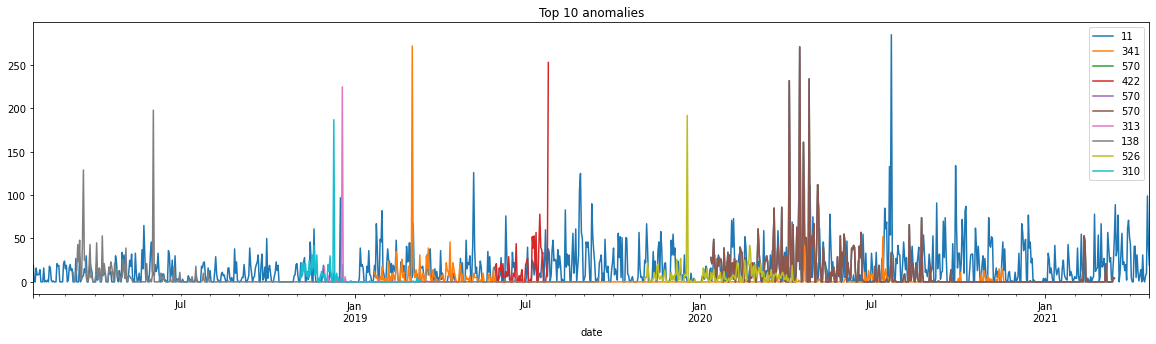

In [185]:
for u in users:
    suspicious_user = one_user_df_prep(df, u)
    suspicious_user.plot(figsize=(20,5), label=u)
    plt.title('Top 10 anomalies')
    plt.legend();

##### **BONUS:** Can you identify users who are viewing both the web dev and data science curriculum?